# Recurrent Neural Networks (RNN)

## 1.	Introduction


### Text mining and NLP problems (IMDB reviews dataset)

-	This project will explore and analyze the information stored in a particular dataset. In this case the IMDB reviews dataset (https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews). We will explore different RNN models.

This project will deliver three different tasks:
1. Implement the selected model.
2. Tuning the presented models and describing how and why the results get improvement.
3. Compare the final model with one other RNN model. 
 

In [3]:
# Define all and only used package imports below
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

# advance ploting
import seaborn as sns

!pip install opendatasets
import opendatasets as od #load kaggle datasets

# stopwords and wordcloud
!pip install nltk
from nltk.corpus import stopwords 
import nltk
nltk.download('stopwords')

!pip install wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import requests
from io import BytesIO

# regular repression
import re
# To encode values
from sklearn.preprocessing import LabelEncoder
# train test split
from sklearn.model_selection import train_test_split

# Libraries needed for modeling
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import LSTM
from keras.layers import GRU

     |████████████████████████████████| 1.5 MB 2.3 MB/s eta 0:00:01��███████████████▎ | 1.4 MB 2.3 MB/s eta 0:00:01
     |████████████████████████████████| 748 kB 39.5 MB/s eta 0:00:01


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


     |████████████████████████████████| 366 kB 4.5 MB/s eta 0:00:01


Using TensorFlow backend.


In [4]:
# train test split
from sklearn.model_selection import train_test_split

## 2.	ELT

### Extract, Load and Transform of data.



- Data should be retrieved from an online source, NOT from your local drive, otherwise, nobody can run your code without additional effort.
- Check the following link on how to retrieve data from kaggle https://www.analyticsvidhya.com/blog/2021/04/how-to-download-kaggle-datasets-using-jupyter-notebook/

In [7]:
# Download data from kaggle
od.download("https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews")

# Read the downloaded file
data = pd.read_csv('./imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

Skipping, found downloaded files in "./imdb-dataset-of-50k-movie-reviews" (use force=True to force download)


### Report the essential description of data.
-	Don’t print out dozens of raw lines.

In [8]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [9]:
# Number of words
data['word_count'] = data['review'].apply(lambda x: len(str(x).split(" ")))
data[['review','word_count']]

#Number of characters
data['char_count'] = data['review'].str.len() ## this also includes spaces
data[['review','char_count']]

# Average word length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

data['avg_word'] = data['review'].apply(lambda x: avg_word(x))

# Number of stop words 
stop = stopwords.words('english')
data['stopwords'] = data['review'].apply(lambda x: len([x for x in x.split() if x in stop]))

# Number of Uppercase words
data['upper'] = data['review'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

# Descriptive statistics of the DataFrame
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
word_count,50000.0,231.145940,171.326419,4.000000,126.000000,173.000000,280.000000,2470.000000
char_count,50000.0,1309.431020,989.728014,32.000000,699.000000,970.000000,1590.250000,13704.000000
avg_word,50000.0,4.640676,0.340731,1.239865,4.417904,4.627006,4.847458,12.290909
stopwords,50000.0,94.768780,71.682687,0.000000,51.000000,72.000000,115.000000,1004.000000
upper,50000.0,4.857800,5.627519,0.000000,1.000000,3.000000,6.000000,162.000000


In [10]:
text = " ".join(review for review in data.review.astype(str))
print ("There are {} words in the combination of all cells in column review.".format(len(text)))
stopwords = set(STOPWORDS)

# to exclude certain words
stopwords.update(["a", "about", "above", "after", "again", "against", "all", 'also' "am", "an", "and", "any", "are",
             "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", 
             "by", 'can', "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", 
             "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", 
             "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", 
             "most", "my", "myself", 'no', 'not', "nor", "of", "on", "once", "only", "or", "other", "ought", "our", 
             "ours", "ourselves", "out", "over", "own", 's', "same", "she", "she'd", "she'll", "she's", "should",
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", 
             "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", 
             "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", 
             "we'll", "we're", "we've", "were", 'will', "what", "what's", "when", "when's", "where", "where's", 
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", 
             "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves", "one", "want", "come", 
             "gets","without", 'rather', "although", "will","character","characters", "see", "even","make", "seem", "br", 
             "movie", "movies", "film","now","two"])


There are 65521550 words in the combination of all cells in column review.


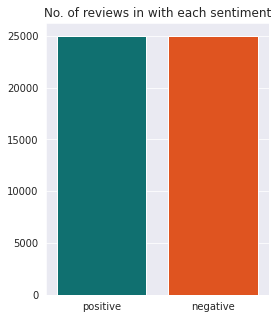

In [11]:
sns.set_style('darkgrid')
plt.figure(figsize=(4, 5))
sns.countplot(data['sentiment'], palette=['teal', 'orangered'])
plt.title('No. of reviews in with each sentiment')
plt.xlabel("")
plt.ylabel("")
plt.show()

In [12]:
def plot_wordcloud(review, cmap):
    fig, ax = plt.subplots(figsize=(12, 9))
    wc = WordCloud(max_words = 2000, background_color ='white', stopwords = stopwords, 
                   min_font_size = 10, colormap=cmap)
    wc = wc.generate(review)
    plt.axis('off')
    plt.imshow(wc)

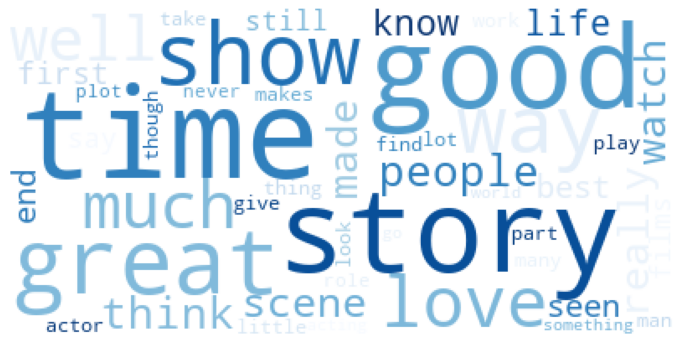

In [13]:
# word cloud on positive reviews
pos_rev = ' '.join(data[data['sentiment']=='positive']['review'].to_list())
plot_wordcloud(pos_rev, 'Blues')

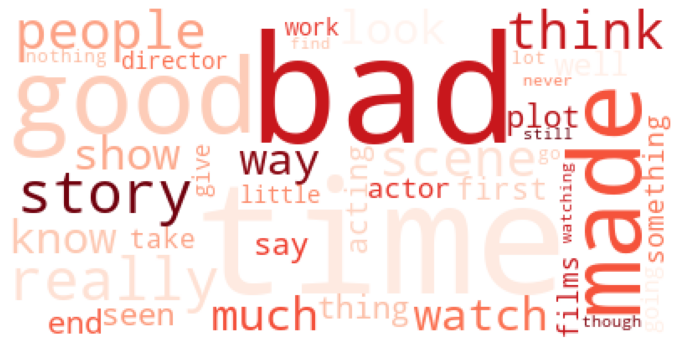

In [14]:
# word cloud on negative reviews
neg_rev = ' '.join(data[data['sentiment']=='negative']['review'].to_list())
plot_wordcloud(neg_rev, 'Reds')

In [15]:
# to remove non alphanumeric character
def alpha_num(text):
    return re.sub(r'[^A-Za-z0-9 ]', '', text)

# to remove the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stopwords:
            final_text.append(i.strip())
    return " ".join(final_text)

# to remove URLs
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# to remove html tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

In [16]:
# apply preprocessing steps

data['review'] = data['review'].apply(remove_URL)
data['review'] = data['review'].apply(remove_html)
data['review'] = data['review'].str.lower()
data['review'] = data['review'].apply(alpha_num)
data['review'] = data['review'].apply(remove_stopwords)

data.head()

,review,sentiment,word_count,char_count,avg_word,stopwords,upper
0,reviewers mentioned watching 1 oz episode youl...,positive,307,1761,4.739414,122,8
1,wonderful little production filming technique ...,positive,162,998,5.166667,62,2
2,thought wonderful way spend time hot summer we...,positive,166,926,4.584337,70,3
3,basically theres family little boy jake thinks...,negative,138,748,4.427536,58,3
4,petter matteis love time money visually stunni...,positive,230,1317,4.730435,92,1


## 3.	Modeling

### Prepare analytics here and construct all the data objects you will use in your report.
•	Write functions and classes to simplify tasks. Do not repeat yourself.

•	Avoid output.

•	Refactor your code until it’s clean

In [17]:
# Split text and label to train/validation
texts = data["review"]
labels = data["sentiment"]

# training_portion = .8
# train_size = int(len(texts) * training_portion)

# train_texts = texts[:train_size]
# train_labels = labels[:train_size]

# validation_texts = texts[train_size:]
# validation_labels = labels[train_size:]

# train-test split
train_texts, validation_texts, train_labels, validation_labels = train_test_split(texts, labels, 
                                                                                          test_size=0.33, 
                                                                                          stratify=labels)

# print(train_size)
# print(len(train_texts))
# print(len(train_labels))
# print(len(validation_texts))
# print(len(validation_labels))

In [18]:
# setting global parameters
vocab_size = 2400
oov_tok = '<OOV>'
embedding_dim = 100
max_length =  120 
trunc_type = 'post'
padding_type = 'post'

In [19]:
# Tokenize and Sequence text 

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_texts)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_texts)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

# print(len(train_sequences[0]))
# print(len(train_padded[0]))
# print(len(train_sequences[1]))
# print(len(train_padded[1]))
# print(len(train_sequences[10]))
# print(len(train_padded[10]))

In [20]:
validation_sequences = tokenizer.texts_to_sequences(validation_texts)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

# print(len(validation_sequences))
# print(validation_padded.shape)

In [21]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

# convert 1,2 sequences into 0,1 
validation_label_seq[validation_label_seq > 1] = 0
training_label_seq[training_label_seq > 1] = 0
# print(training_label_seq[0])
# print(training_label_seq[1])
# print(training_label_seq[2])
# print(training_label_seq.shape)

# print(validation_label_seq[0])
# print(validation_label_seq[1])
# print(validation_label_seq[2])
# print(validation_label_seq.shape)

In [22]:
# to plot model accuracy and loss

def plot_history(history):
    
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy', c='green', lw='2')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', c='orangered', lw='2')
    plt.title('Accuracy', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss', c='green', lw='2')
    plt.plot(history.history['val_loss'], label='Validation Loss', c='orangered', lw='2')
    plt.title('Loss', loc='left', fontsize=16)
    plt.xlabel("Epochs")
    plt.ylabel('Loss')
    plt.legend()
    
    plt.show()

## 4.	Results

•	Print out relevant tables nicely, display well-annotated charts and explain if needed in plain English.
•	Use minimum code here, just output-functions’ calls.

### Non-sequential NN

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()

In [50]:
num_epochs = 100
history = model.fit(train_padded, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq), 
                    verbose=2)

Train on 33500 samples, validate on 16500 samples
Epoch 1/100
33500/33500 - 8s - loss: 0.3961 - accuracy: 0.8367 - val_loss: 0.3111 - val_accuracy: 0.8716
Epoch 2/100
33500/33500 - 9s - loss: 0.2907 - accuracy: 0.8789 - val_loss: 0.3069 - val_accuracy: 0.8720
Epoch 3/100
33500/33500 - 8s - loss: 0.2796 - accuracy: 0.8838 - val_loss: 0.3111 - val_accuracy: 0.8693
Epoch 4/100
33500/33500 - 8s - loss: 0.2749 - accuracy: 0.8866 - val_loss: 0.3144 - val_accuracy: 0.8683
Epoch 5/100
33500/33500 - 8s - loss: 0.2719 - accuracy: 0.8878 - val_loss: 0.3201 - val_accuracy: 0.8652
Epoch 6/100
33500/33500 - 8s - loss: 0.2700 - accuracy: 0.8908 - val_loss: 0.3162 - val_accuracy: 0.8671
Epoch 7/100
33500/33500 - 8s - loss: 0.2689 - accuracy: 0.8890 - val_loss: 0.3200 - val_accuracy: 0.8669
Epoch 8/100
33500/33500 - 7s - loss: 0.2677 - accuracy: 0.8895 - val_loss: 0.3173 - val_accuracy: 0.8681
Epoch 9/100
33500/33500 - 8s - loss: 0.2661 - accuracy: 0.8908 - val_loss: 0.3272 - val_accuracy: 0.8632
Epoch

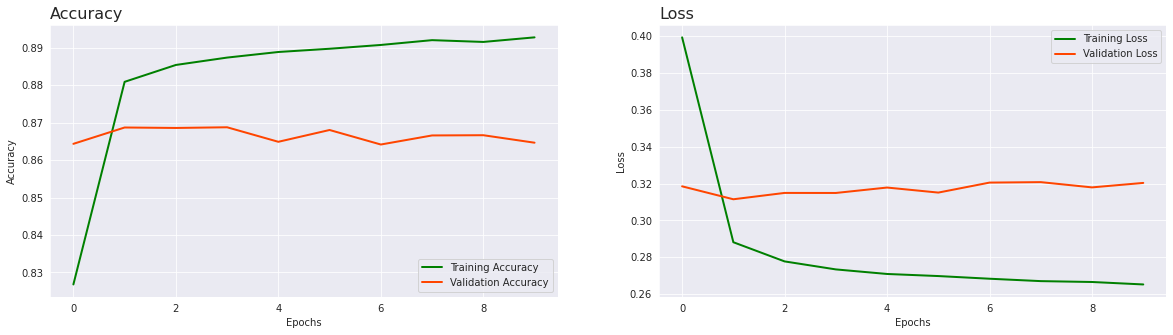

In [25]:
# plot history
plot_history(history)

In [1]:
num_epochs = 10
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(12)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


history = model.fit(train_padded, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

NameError: name 'tf' is not defined

### With LSTM

In [51]:
num_epochs = 10
 
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(12)),
    tf.keras.layers.Dense(12, activation='selu'),
    tf.keras.layers.Dense(6, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
# model.summary()


history = model.fit(train_padded, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

Train on 33500 samples, validate on 16500 samples
Epoch 1/100
33500/33500 [==============================] - 68s 2ms/sample - loss: 0.5874 - accuracy: 0.7239 - val_loss: 0.5355 - val_accuracy: 0.7660
Epoch 2/100
33500/33500 [==============================] - 61s 2ms/sample - loss: 0.4598 - accuracy: 0.8207 - val_loss: 0.4116 - val_accuracy: 0.8402
Epoch 3/100
33500/33500 [==============================] - 63s 2ms/sample - loss: 0.3994 - accuracy: 0.8558 - val_loss: 0.3796 - val_accuracy: 0.8557
Epoch 4/100
33500/33500 [==============================] - 64s 2ms/sample - loss: 0.3303 - accuracy: 0.8804 - val_loss: 0.3756 - val_accuracy: 0.8361
Epoch 5/100
33500/33500 [==============================] - 63s 2ms/sample - loss: 0.2895 - accuracy: 0.8973 - val_loss: 0.3452 - val_accuracy: 0.8667
Epoch 6/100
33500/33500 [==============================] - 63s 2ms/sample - loss: 0.2579 - accuracy: 0.9106 - val_loss: 0.3487 - val_accuracy: 0.8613
Epoch 7/100
33500/33500 [=========================

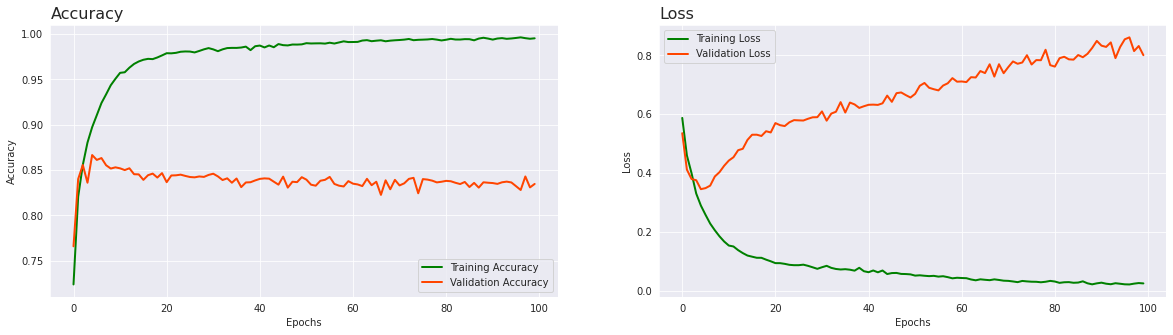

In [52]:
# plot history
plot_history(history)

## LSTM - 2 Layer

In [ ]:
# model initialization
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(50)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(train_padded, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

Train on 33500 samples, validate on 16500 samples
Epoch 1/100
33500/33500 [==============================] - 224s 7ms/sample - loss: 0.6666 - accuracy: 0.5934 - val_loss: 0.6938 - val_accuracy: 0.4996
Epoch 2/100
18368/33500 [===============>..............] - ETA: 1:20 - loss: 0.6151 - accuracy: 0.6731

In [ ]:
# plot history
plot_history(history)

### With GRU 

In [40]:
num_epochs = 10
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(50)),
    tf.keras.layers.Dense(24, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.summary()


history = model.fit(train_padded, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

Train on 33500 samples, validate on 16500 samples
Epoch 1/10
33500/33500 [==============================] - 97s 3ms/sample - loss: 0.4136 - accuracy: 0.8062 - val_loss: 0.3285 - val_accuracy: 0.8602
Epoch 2/10
33500/33500 [==============================] - 89s 3ms/sample - loss: 0.2885 - accuracy: 0.8811 - val_loss: 0.3093 - val_accuracy: 0.8667
Epoch 3/10
33500/33500 [==============================] - 86s 3ms/sample - loss: 0.2455 - accuracy: 0.9012 - val_loss: 0.3222 - val_accuracy: 0.8632
Epoch 4/10
33500/33500 [==============================] - 89s 3ms/sample - loss: 0.2049 - accuracy: 0.9201 - val_loss: 0.3609 - val_accuracy: 0.8597
Epoch 5/10
33500/33500 [==============================] - 89s 3ms/sample - loss: 0.1678 - accuracy: 0.9354 - val_loss: 0.3746 - val_accuracy: 0.8602
Epoch 6/10
33500/33500 [==============================] - 87s 3ms/sample - loss: 0.1290 - accuracy: 0.9528 - val_loss: 0.4528 - val_accuracy: 0.8550
Epoch 7/10
33500/33500 [==============================] 

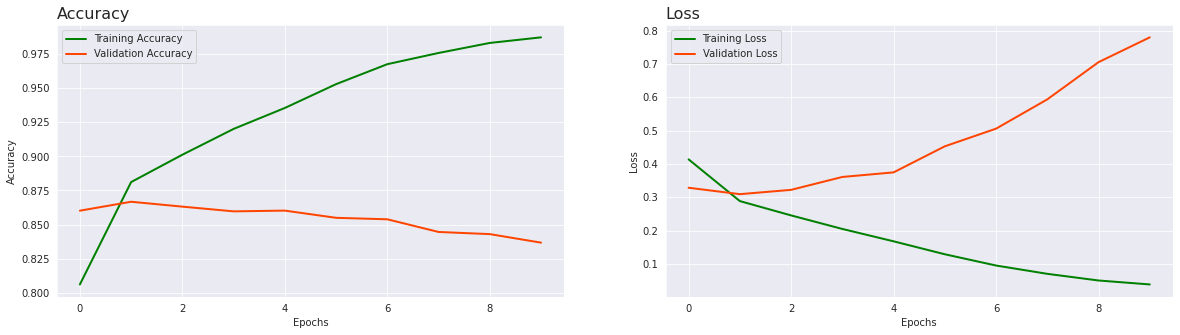

In [41]:
# plot history
plot_history(history)

In [ ]:
# num_epochs = 10
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(100, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(50)),
    tf.keras.layers.Dense(24, activation='selu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model.summary()


history = model.fit(train_padded, 
                    training_label_seq, 
                    epochs=num_epochs, 
                    validation_data=(validation_padded, validation_label_seq))

In [ ]:
# plot history
plot_history(history)

## 5.	Conclusions

•	Summarize your findings here in 5...10 lines of text.

In [ ]:
#! git clone https://github.com/AlexTouvras/FindingSimilarItems

In [ ]:
#! git add -A

In [ ]:
# ! git commit -am "initial modelling" 
# ! git push 